In [1]:
import json
import pandas as pd
import seaborn as sns

# Making a dataset
Extracting information from files and making dataset

In [2]:
model_r = []
persons = []
with open('Released_Score.log') as f:
    for line in f.readlines():
        try:
            filename, _, score = line.split()
        except ValueError:
            continue
        filename = filename.split('/')[4]
        persons.append(filename)
        model_r.append(float(score))

In [3]:
models = []
file_names = ['Model1_Score.log','Model2_Score.log','Model3_Score.log']
for file in file_names:
    model = []
    with open(file) as f:
        for line in f.readlines():
            try:
                _, _, score = line.split()
            except ValueError:
                continue
            model.append(float(score))
    models.append(model)

In [4]:
df = pd.DataFrame(list(zip(persons, model_r, models[0], models[1], models[2])), columns =['person', 'score_r', 'score_1', 'score_2', 'score_3'])
df

,person,score_r,score_1,score_2,score_3
0,man14,0.979097,0.972658,0.971708,0.973197
1,man14,0.981674,0.955762,0.976141,0.976397
2,man14,0.978848,0.969935,0.972269,0.973301
3,man14,0.980426,0.974519,0.976325,0.974871
4,man14,0.980022,0.969165,0.972529,0.974813
...,...,...,...,...,...
96,woman45,0.939103,0.866210,0.909110,0.895790
97,woman46,0.976487,0.976499,0.980432,0.981315
98,woman46,0.983049,0.975573,0.979455,0.977189
99,man25,0.977677,0.966337,0.973323,0.972189


# Dataset visualization

<AxesSubplot:ylabel='Count'>

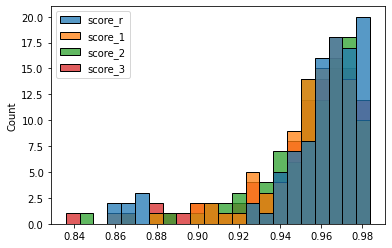

In [5]:
sns.histplot(df)

<AxesSubplot:xlabel='score_r', ylabel='Count'>

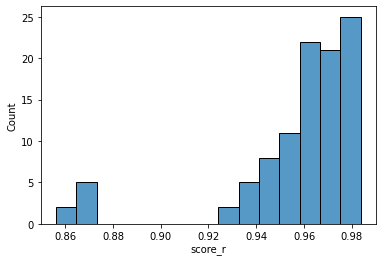

In [6]:
sns.histplot(df['score_r'])

<AxesSubplot:xlabel='score_1', ylabel='Count'>

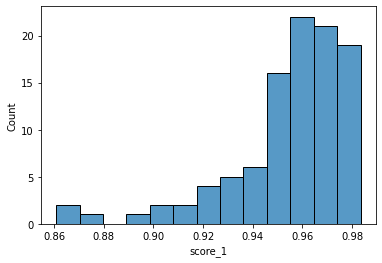

In [7]:
sns.histplot(df['score_1'])

<AxesSubplot:xlabel='score_2', ylabel='Count'>

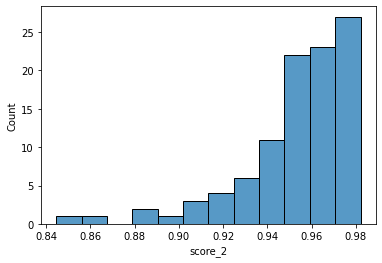

In [8]:
sns.histplot(df['score_2'])

<AxesSubplot:xlabel='score_3', ylabel='Count'>

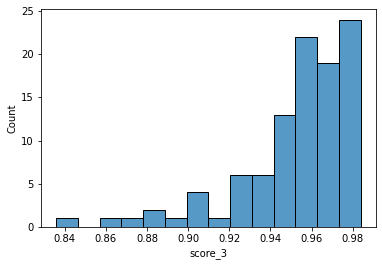

In [9]:
sns.histplot(df['score_3'])

Lets check if the lower values of each model are the same files.

In [10]:
df.score_r[df.score_r < 0.88]

67    0.871647
68    0.856233
70    0.867496
74    0.873189
82    0.858717
93    0.871753
94    0.867066
Name: score_r, dtype: float64

In [11]:
df.score_1[df.score_1 < 0.88]

68    0.876849
70    0.860822
96    0.866210
Name: score_1, dtype: float64

In [12]:
df.score_2[df.score_2 < 0.88]

68    0.867248
81    0.844496
Name: score_2, dtype: float64

In [13]:
df.score_3[df.score_3 < 0.88]

68    0.866225
74    0.879072
81    0.835939
93    0.877116
Name: score_3, dtype: float64

# Comparing models using thresholds
We will define several thresholds and see each model prediction count that is 

In [14]:
thresholds = [0.85, 0.87, 0.89, 0.91, 0.93, 0.95, 0.97, 0.99]

In [15]:
m_r = []
m_1 = []
m_2 = []
m_3 = []

In [16]:
for threshold in thresholds:
    m_r.append(df.score_r[df.score_r < threshold].count())
    m_1.append(df.score_1[df.score_1 < threshold].count())
    m_2.append(df.score_2[df.score_2 < threshold].count())
    m_3.append(df.score_3[df.score_3 < threshold].count())

In [17]:
df_t = pd.DataFrame(list(zip(thresholds, m_r, m_1, m_2, m_3)), columns =['thresholds', 'Model released', 'Model 1', 'Model 2', 'Model 3'])
df_t

,thresholds,Model released,Model 1,Model 2,Model 3
0,0.85,0,0,1,1
1,0.87,4,2,2,2
2,0.89,7,3,4,5
3,0.91,7,7,7,10
4,0.93,9,14,14,17
5,0.95,22,30,30,31
6,0.97,64,77,73,73
7,0.99,101,101,101,101


From here we can see that the Released model is not neccesarraly the best -> if we take a look at threshold 0.89 we can see that there are 7 records that are below the threshold in released model. In the higher thresholds it performes better but if it has already low scores it cannot be considered the best. So we will choose from other 3 models.

# Maximum score per file
We will check which model result the maximum score for each file.

In [18]:
df[['score_r', 'score_1', 'score_2', 'score_3']].idxmax(axis=1).value_counts()

score_r    69
score_1    15
score_3    13
score_2     4
dtype: int64

We can see that the released model's predictions are better, but as we see that it has some really low values (and it is worse in terms of CPU usage) we will check the maximum score without the Released model.

In [19]:
df[['score_1', 'score_2', 'score_3']].idxmax(axis=1).value_counts()

score_1    41
score_2    31
score_3    29
dtype: int64

The values are close, but we can see that the first model performes the best.